2210210338 张淼

In [1]:
# 1. 创建一个字符串变量
sentence = "Orange's unit price is 5 yuan."

# 2. 提取出里面的数字5并赋值给新的变量
# 使用 split 和 strip 方法提取数字
price_str = sentence.split()[4]  # 通过空格分隔，获取第五个元素
price = price_str.strip()  # 去除可能的空格（虽然在这个例子中没有）

# 3. 查看新变量的数据类型
print("提取的数字:", price)
print("数据类型:", type(price))  # 查看 price 的数据类型

# 4. 将提取的数字5转换成整型（int）
price_int = int(price)

# 5. 确认数据类型是否转换成功
print("转换后的数字:", price_int)
print("转换后的数据类型:", type(price_int))  # 查看 price_int 的数据类型


提取的数字: 5
数据类型: <class 'str'>
转换后的数字: 5
转换后的数据类型: <class 'int'>


创建Iris数据集

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

# 加载 Iris 数据集
iris = load_iris()

# 创建 DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# 添加标签
iris_df['species'] = iris.target

# 将数据集保存为 CSV 文件
iris_df.to_csv('iris.csv', index=False)


对Iris数据集进行探索性分析

样本数量: 150, 特征数量: 4
均值: [5.84333333 3.05733333 3.758      1.19933333], 标准差: [0.82530129 0.43441097 1.75940407 0.75969263]
最小值: [4.3 2.  1.  0.1], 最大值: [7.9 4.4 6.9 2.5]
类别分布: {0.0: 50, 1.0: 50, 2.0: 50}


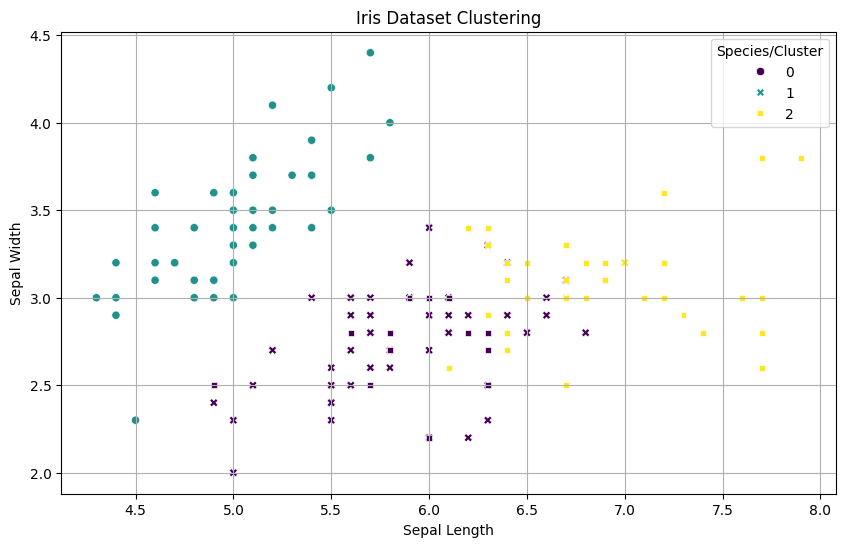

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

class IrisAnalysis:
    def __init__(self, data):
        self.data = data
        self.features = data[:, :-1]  # 提取特征
        self.labels = data[:, -1]      # 提取标签

    @classmethod
    def load_data(cls, filepath):
        """加载 Iris 数据集"""
        df = pd.read_csv(filepath)
        return cls(df.values)  # 返回 IrisAnalysis 类的实例

    def basic_info(self):
        """统计数据的基本信息"""
        shape = self.data.shape
        num_samples = shape[0]
        num_features = shape[1] - 1  # 减去标签列
        return num_samples, num_features

    def calculate_statistics(self):
        """计算均值和标准差"""
        mean = np.mean(self.features, axis=0)
        std_dev = np.std(self.features, axis=0)
        return mean, std_dev

    def min_max_values(self):
        """查找每个特征的最大值和最小值"""
        min_values = np.min(self.features, axis=0)
        max_values = np.max(self.features, axis=0)
        return min_values, max_values

    def class_distribution(self):
        """查看每个类别的分布"""
        unique, counts = np.unique(self.labels, return_counts=True)
        return dict(zip(unique, counts))

    def cluster_analysis(self, n_clusters=3):
        """进行聚类分析"""
        kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        self.cluster_labels = kmeans.fit_predict(self.features)
        return self.cluster_labels

    def visualize_clusters(self):
        """可视化聚类结果"""
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=self.features[:, 0], y=self.features[:, 1], 
                        hue=self.cluster_labels, palette='viridis', style=self.labels)
        plt.title('Iris Dataset Clustering')
        plt.xlabel('Sepal Length')
        plt.ylabel('Sepal Width')
        plt.legend(title='Species/Cluster', loc='upper right')
        plt.grid()
        plt.show()

# 使用该类进行分析
if __name__ == "__main__":
    # 假设 iris 数据集已保存在 'iris.csv' 文件中
    iris_data = IrisAnalysis.load_data('iris.csv')
    
    # 获取基本信息
    num_samples, num_features = iris_data.basic_info()
    print(f"样本数量: {num_samples}, 特征数量: {num_features}")
    
    # 计算统计信息
    mean, std_dev = iris_data.calculate_statistics()
    print(f"均值: {mean}, 标准差: {std_dev}")

    # 最大值和最小值
    min_values, max_values = iris_data.min_max_values()
    print(f"最小值: {min_values}, 最大值: {max_values}")

    # 类别分布
    distribution = iris_data.class_distribution()
    print(f"类别分布: {distribution}")

    # 进行聚类分析
    iris_data.cluster_analysis(n_clusters=3)

    # 可视化聚类结果
    iris_data.visualize_clusters()


99. Given an integer n and a 2D array X, select from X the rows which can be interpreted as draws from a multinomial distribution with n degrees, i.e., the rows which only contain integers and which sum to n. (★★★)
给定一个整数 n 和一个二维数组 X，从 X 中选择可以被解释为从具有 n 个自由度的多项分布中抽取的行，即只包含整数且其元素之和等于 n 的行。 (★★★)

In [3]:
import numpy as np

def select_multinomial_rows(n, X):
    valid_rows = []
    row_length = None  # 用于存储第一行有效行的长度

    for row in X:
        # 检查所有元素是否为整数
        if all(isinstance(x, int) for x in row):
            # 检查行的元素和是否等于 n
            if sum(row) == n:
                # 如果这是第一行有效行，存储它的长度
                if row_length is None:
                    row_length = len(row)
                
                # 仅当行的长度与预期长度一致时才加入
                if len(row) == row_length:
                    valid_rows.append(row)

    # 如果存在有效行，将它们转换为 NumPy 数组
    if valid_rows:
        return np.array(valid_rows)
    else:
        return np.array([])  # 如果没有有效行，返回一个空数组

# 示例用法
n = 5
X = [
    [1, 2, 2],   # 有效: 和 = 5
    [3, 2, 0],   # 有效: 和 = 5
    [5, 0, 0],   # 有效: 和 = 5
    [1, 1, 1, 2], # 无效: 长度大于 3
    [2.5, 2, 0], # 无效: 不是整数
    [0, 5, 0]    # 有效: 和 = 5
]

valid_rows = select_multinomial_rows(n, X)
print(valid_rows)


[[1 2 2]
 [3 2 0]
 [5 0 0]
 [0 5 0]]


100. Compute bootstrapped 95% confidence intervals for the mean of a 1D array X (i.e., resample the elements of an array with replacement N times, compute the mean of each sample, and then compute percentiles over the means). (★★★)
计算一维数组 X 的均值的自助法 95% 置信区间（即对数组的元素进行有放回的 N 次重采样，计算每个样本的均值，然后计算这些均值的百分位数）。 (★★★)

In [4]:
import numpy as np

def bootstrap_confidence_interval(X, N=1000, confidence_level=0.95):
    # 确保输入为一维数组
    X = np.asarray(X).flatten()
    
    # 存储均值的列表
    means = []
    
    # 进行 N 次重采样
    for _ in range(N):
        sample = np.random.choice(X, size=len(X), replace=True)  # 有放回的采样
        means.append(np.mean(sample))  # 计算样本均值
    
    # 计算置信区间的上下界
    lower_bound = np.percentile(means, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(means, (confidence_level + (1 - confidence_level) / 2) * 100)
    
    return lower_bound, upper_bound

# 示例用法
X = [1, 2, 3, 4, 5]  # 一维数组
lower, upper = bootstrap_confidence_interval(X, N=1000, confidence_level=0.95)
print(f"95% 置信区间: ({lower}, {upper})")


95% 置信区间: (1.8, 4.2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8568 entries, 0 to 8567
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         8568 non-null   datetime64[ns]
 1   Order_Class  8568 non-null   object        
 2   Sales        8568 non-null   float64       
 3   Transport    8568 non-null   object        
 4   Trans_Cost   8568 non-null   float64       
 5   Region       8568 non-null   object        
 6   Category     8568 non-null   object        
 7   Box_Type     8568 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 535.6+ KB
None
Order_Class            中级            低级            其它            高级
Region                                                             
东北           7.630418e+05  4.812195e+05  4.065162e+05  4.751733e+05
华东           1.023900e+06  6.923270e+05  4.882923e+05  4.953492e+05
华北           1.100680e+06  5.864751e+05  5.728934e+05 

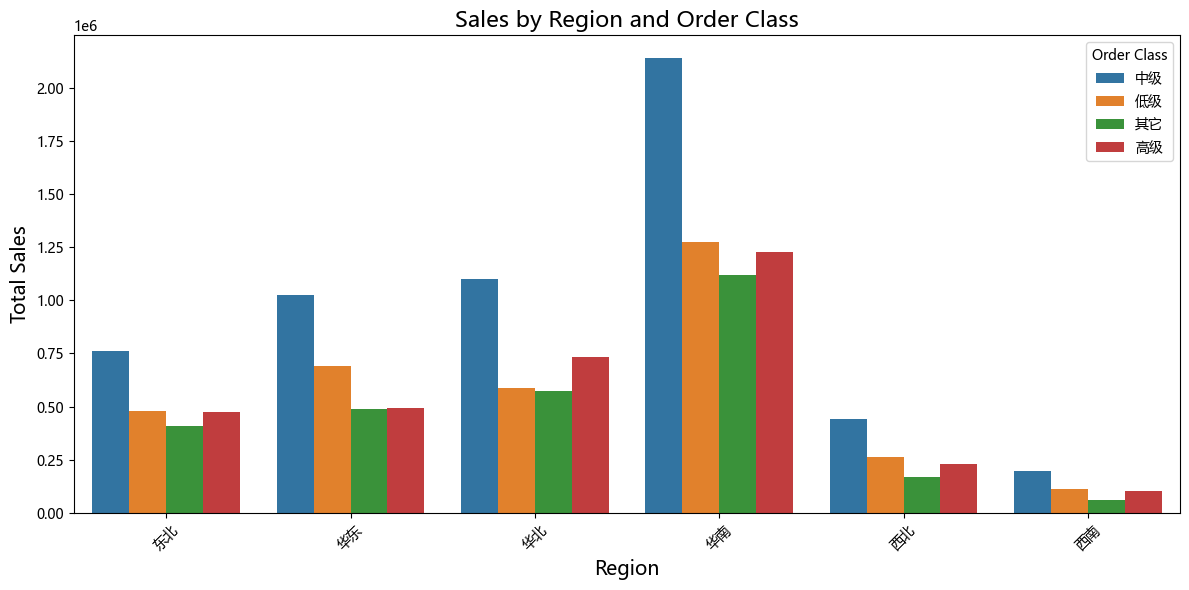

  Transport  Trans_Cost
0        大卡   45.277515
1        火车    7.695159
2        空运    7.937970


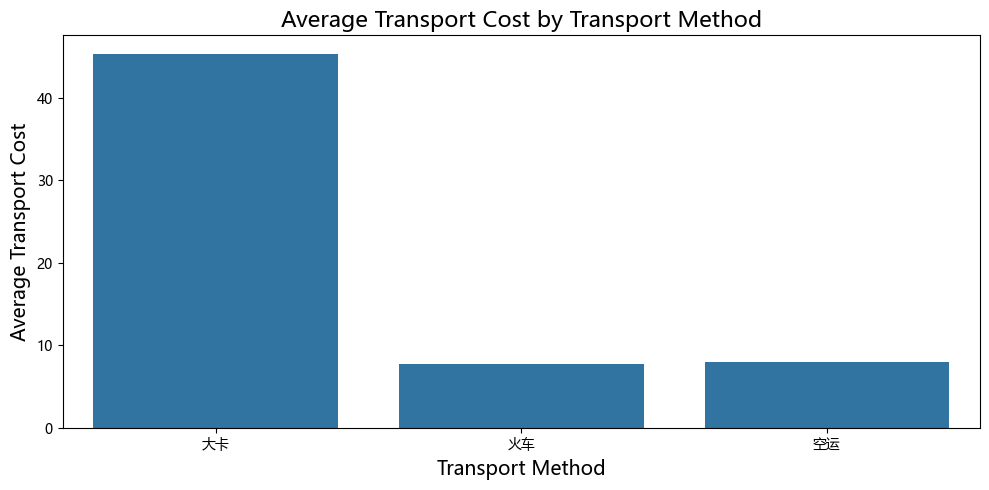

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取 Excel 文件
file_path = r'C:\Users\hp\Desktop\code\Python作业\Trade.xlsx'  # 替换为你的 Excel 文件路径
data = pd.read_excel(file_path)

# 查看数据的基本信息
print(data.info())

# 数据预处理
data['Date'] = pd.to_datetime(data['Date'])

# 计算每个 Region 和 Order_Class 的销售总额
sales_summary = data.groupby(['Region', 'Order_Class'])['Sales'].sum().reset_index()

# 生成一个透视表
sales_pivot = sales_summary.pivot(index='Region', columns='Order_Class', values='Sales').fillna(0)

# 打印透视表
print(sales_pivot)

# 可视化销售数据
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_summary, x='Region', y='Sales', hue='Order_Class', errorbar=None)
plt.title('Sales by Region and Order Class', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.legend(title='Order Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 计算运输成本的平均值
transport_cost_summary = data.groupby('Transport')['Trans_Cost'].mean().reset_index()

# 打印运输成本的平均值
print(transport_cost_summary)

# 可视化运输成本的平均值
plt.figure(figsize=(10, 5))
sns.barplot(data=transport_cost_summary, x='Transport', y='Trans_Cost')
plt.title('Average Transport Cost by Transport Method', fontsize=16)
plt.xlabel('Transport Method', fontsize=14)
plt.ylabel('Average Transport Cost', fontsize=14)
plt.tight_layout()
plt.show()
